# Imports, acquire data and prepare:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import (classification_report,
 confusion_matrix, accuracy_score, precision_score, recall_score)
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

from env import get_connection
import acquire, prepare

pd.options.display.max_columns = None

In [2]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 
def train_validate(df, stratify_col = None):
    """
    This function takes in a DataFrame and column name for the stratify argument (defualt is None).
    It will split the data into three parts for training, testing and validating.
    """
    #This is logic to set the stratify argument:
    stratify_arg = ''
    if stratify_col != None:
        stratify_arg = df[stratify_col]
    else:
        stratify_arg = None
    
    #This splits the DataFrame into 'train' and 'test':
    train, test = train_test_split(df, train_size=.7, stratify=stratify_arg, random_state = 321)
    
    #The length of the stratify column changed and needs to be adjusted:
    if stratify_col != None:
        stratify_arg = train[stratify_col]
        
    #This splits the larger 'train' DataFrame into a smaller 'train' and 'validate' DataFrames:
    train, validate = train_test_split(train, test_size=.5, stratify=stratify_arg, random_state = 321)
    return train, validate, test

In [3]:
#Acquire and prepare data for processing:
titanic = acquire.get_titanic_data()
titanic = prepare.prep_titanic(titanic)

In [4]:
#Split data into train, validate and test:
ti_train, ti_val, ti_test = train_validate(titanic, 'survived')

In [5]:
ti_train.survived.value_counts()

0    192
1    119
Name: survived, dtype: int64

In [6]:
ti_train.survived.mode()

0    0
Name: survived, dtype: int64

In [7]:
#Creates the various sets and drops the target column from the X set:
X_train = ti_train.drop(columns=['survived'])
y_train = ti_train['survived']

X_val = ti_val.drop(columns=['survived'])
y_val = ti_val['survived']

X_test = ti_test.drop(columns=['survived'])
y_test = ti_test['survived']

# Random Forest Exercises

## 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [8]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf = 1, random_state= 42)

In [9]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [10]:
y_pred = rf.predict(X_train)

## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [11]:
rf.score(X_train, y_train)

0.9421221864951769

In [12]:
pd.DataFrame(confusion_matrix(y_train, y_pred), index=['Pred_death', 'Pred_live'], columns=['Act_death', 'Act_live'])

,Act_death,Act_live
Pred_death,189,3
Pred_live,15,104


In [13]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       192
           1       0.97      0.87      0.92       119

    accuracy                           0.94       311
   macro avg       0.95      0.93      0.94       311
weighted avg       0.94      0.94      0.94       311



## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [14]:
train_df = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))
train_df.round(2)
#target_names = ['deceased', 'survived']

,0,1,accuracy,macro avg,weighted avg
precision,0.93,0.97,0.94,0.95,0.94
recall,0.98,0.87,0.94,0.93,0.94
f1-score,0.95,0.92,0.94,0.94,0.94
support,192.00,119.00,0.94,311.00,311.00


In [15]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

(189, 3, 15, 104)

In [16]:
rf_acc = round((TP + TN)/(TP+FP+FN+TN),2)
rf_acc

0.94

In [17]:
rf_prec = round(TP/(TP+FP),2)
rf_prec

0.97

In [18]:
rf_recall = round(TP/(TP+FN), 2)
rf_recall

0.87

## 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [19]:
seed = 42
#Write a for loop to create a new forest for each depth.
for i in range (1, 11):
    rf = RandomForestClassifier(max_depth=i, random_state=seed, min_samples_leaf=1)
    rf.fit(X_train, y_train)
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_val, y_val)
    
    print(f' Max depth of {i}. Train accuracy: {train_acc:.4f}. Validation accuracy: {val_acc:.4f}')
    print()
    print('-------------------------------------')
    #Build object to hold metrics to explore:

 Max depth of 1. Train accuracy: 0.7717. Validation accuracy: 0.7436

-------------------------------------
 Max depth of 2. Train accuracy: 0.8103. Validation accuracy: 0.7821

-------------------------------------
 Max depth of 3. Train accuracy: 0.8167. Validation accuracy: 0.7885

-------------------------------------
 Max depth of 4. Train accuracy: 0.8521. Validation accuracy: 0.7949

-------------------------------------
 Max depth of 5. Train accuracy: 0.8907. Validation accuracy: 0.8077

-------------------------------------
 Max depth of 6. Train accuracy: 0.8971. Validation accuracy: 0.7949

-------------------------------------
 Max depth of 7. Train accuracy: 0.9228. Validation accuracy: 0.8109

-------------------------------------
 Max depth of 8. Train accuracy: 0.9357. Validation accuracy: 0.8173

-------------------------------------
 Max depth of 9. Train accuracy: 0.9421. Validation accuracy: 0.8109

-------------------------------------
 Max depth of 10. Train accu

In [20]:
seed = 42
#Write a for loop to create a new forest for each depth.
for i in range (1, 11):
    rf = RandomForestClassifier(max_depth=10, random_state=seed, min_samples_leaf=i)
    rf.fit(X_train, y_train)
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_val, y_val)
    
    print(f' Min_samples_leaf of {i}. Train accuracy: {train_acc:.4f}. Validation accuracy: {val_acc:.4f}')
    print()
    print('-------------------------------------')
    #Build object to hold metrics to explore:

 Min_samples_leaf of 1. Train accuracy: 0.9421. Validation accuracy: 0.8045

-------------------------------------
 Min_samples_leaf of 2. Train accuracy: 0.9035. Validation accuracy: 0.8013

-------------------------------------
 Min_samples_leaf of 3. Train accuracy: 0.8875. Validation accuracy: 0.7853

-------------------------------------
 Min_samples_leaf of 4. Train accuracy: 0.8650. Validation accuracy: 0.7885

-------------------------------------
 Min_samples_leaf of 5. Train accuracy: 0.8553. Validation accuracy: 0.7853

-------------------------------------
 Min_samples_leaf of 6. Train accuracy: 0.8585. Validation accuracy: 0.7885

-------------------------------------
 Min_samples_leaf of 7. Train accuracy: 0.8296. Validation accuracy: 0.7853

-------------------------------------
 Min_samples_leaf of 8. Train accuracy: 0.8457. Validation accuracy: 0.7885

-------------------------------------
 Min_samples_leaf of 9. Train accuracy: 0.8135. Validation accuracy: 0.7885

---

In [21]:
rf_2 = RandomForestClassifier(max_depth=15, min_samples_leaf = 5, random_state= 42)

In [22]:
rf_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, random_state=42)

In [23]:
y_pred_2 = rf_2.predict(X_train)

In [24]:
y_val_pred = rf.predict(X_val)

In [25]:
y_2_val_pred = rf.predict(X_val)

## 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [26]:
print("Report for first train random_forest:")
print(classification_report(y_train, y_pred))
print("-------------------------------------------------")
print("Report for second train random_forest:")
print(classification_report(y_train, y_pred_2))
print("=================================================")
print("Report for first validate random_forest:")
print(classification_report(y_val, y_val_pred))
print("-------------------------------------------------")
print("Report for second validate random_forest:")
print(classification_report(y_val, y_2_val_pred))

Report for first train random_forest:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       192
           1       0.97      0.87      0.92       119

    accuracy                           0.94       311
   macro avg       0.95      0.93      0.94       311
weighted avg       0.94      0.94      0.94       311

-------------------------------------------------
Report for second train random_forest:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       192
           1       0.88      0.73      0.80       119

    accuracy                           0.86       311
   macro avg       0.86      0.83      0.84       311
weighted avg       0.86      0.86      0.86       311

Report for first validate random_forest:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       192
           1       0.88      0.51      0.65       120

    accuracy  

In [27]:
pd.DataFrame(confusion_matrix(y_val, y_2_val_pred), index=['Pred_live', 'Pred_death'], columns=['Act_live','Act_death'])

,Act_live,Act_death
Pred_live,184,8
Pred_death,59,61


## Question: After making a few models, which one has the best performance (or closest metrics) on both train and validate?

- Answer: The first model (10 layers deep) has the best but there are indications that it is overfit. The training set scored an accuracy of 94 but the validation set scored 86.

### Adjusting max_depth:

In [28]:
metrics = []

for i in range(1, 50):
    rf_5 = RandomForestClassifier(max_depth=i, min_samples_leaf = 5, random_state= 42)
    rf_5 = rf_5.fit(X_train, y_train)
    in_sample_accuracy = rf_5.score(X_train, y_train)
    out_of_sample_accuracy = rf_5.score(X_val, y_val)

    output = {"max_depth" : i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    metrics.append(output)

df = pd.DataFrame(metrics)              
df['difference'] = df.train_accuracy - df.validate_accuracy              
#df              


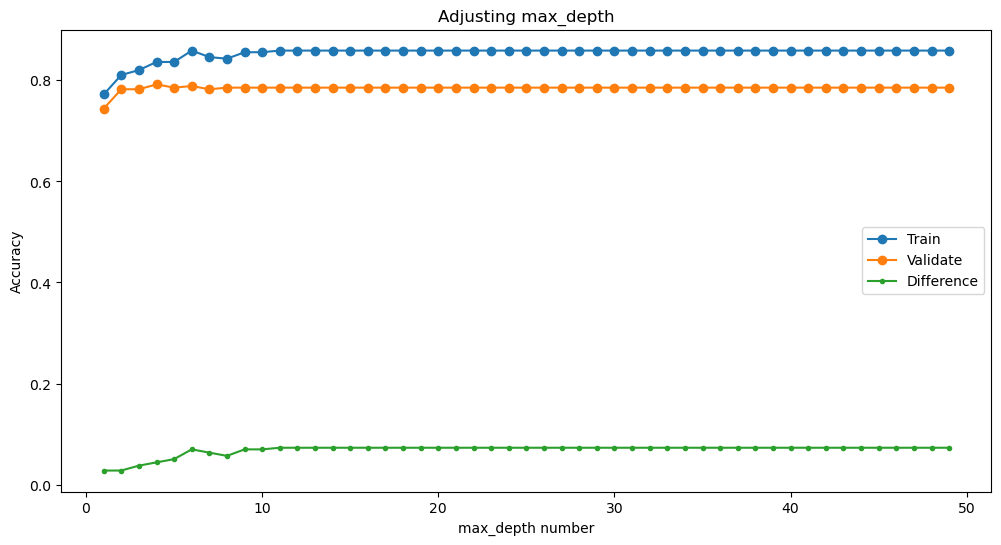

In [29]:

plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label= 'Validate')
plt.plot(df.max_depth, df.difference, marker = '.', label = 'Difference')

plt.legend()
plt.title("Adjusting max_depth")
plt.xlabel("max_depth number")
plt.ylabel("Accuracy")
plt.show()


### Adjusting min_samples_leaf, max_leaf = 1:

In [30]:
metrics = []

for i in range(1, 50):
    rf_5 = RandomForestClassifier(max_depth=1, min_samples_leaf = i, random_state= 42)
    rf_5 = rf_5.fit(X_train, y_train)
    in_sample_accuracy = rf_5.score(X_train, y_train)
    out_of_sample_accuracy = rf_5.score(X_val, y_val)

    output = {"max_depth" : i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    metrics.append(output)

df = pd.DataFrame(metrics)              
df['difference'] = df.train_accuracy - df.validate_accuracy              
#df              


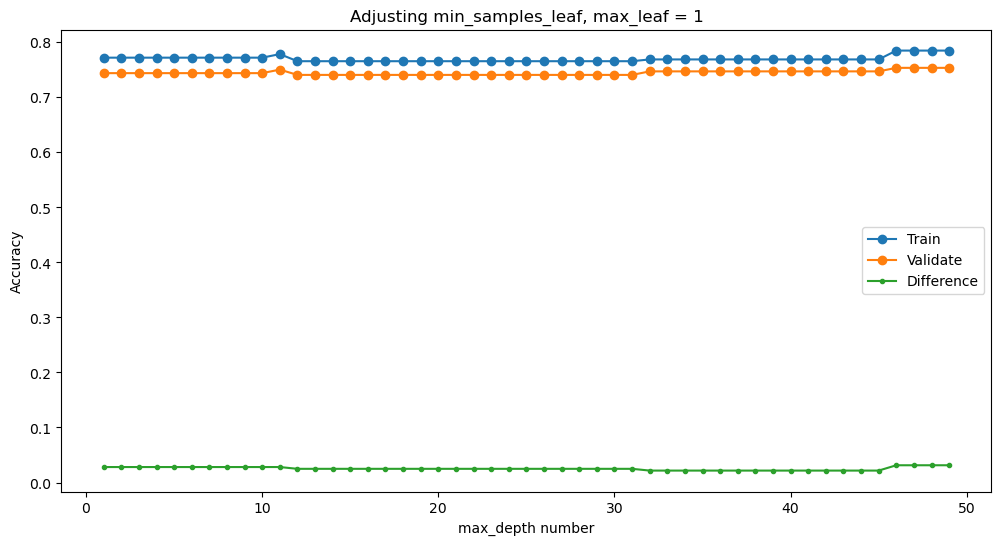

In [31]:

plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label= 'Validate')
plt.plot(df.max_depth, df.difference, marker = '.', label = 'Difference')
plt.legend()
plt.title("Adjusting min_samples_leaf, max_leaf = 1")
plt.xlabel("max_depth number")
plt.ylabel("Accuracy")
plt.show()


### Adjusting min_samples_leaf, max_leaf = 10:

In [32]:
metrics = []

for i in range(1, 50):
    rf_5 = RandomForestClassifier(max_depth=10, min_samples_leaf = i, random_state= 42)
    rf_5 = rf_5.fit(X_train, y_train)
    in_sample_accuracy = rf_5.score(X_train, y_train)
    out_of_sample_accuracy = rf_5.score(X_val, y_val)

    output = {"max_depth" : i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    metrics.append(output)

df = pd.DataFrame(metrics)              
df['difference'] = df.train_accuracy - df.validate_accuracy              
#df              


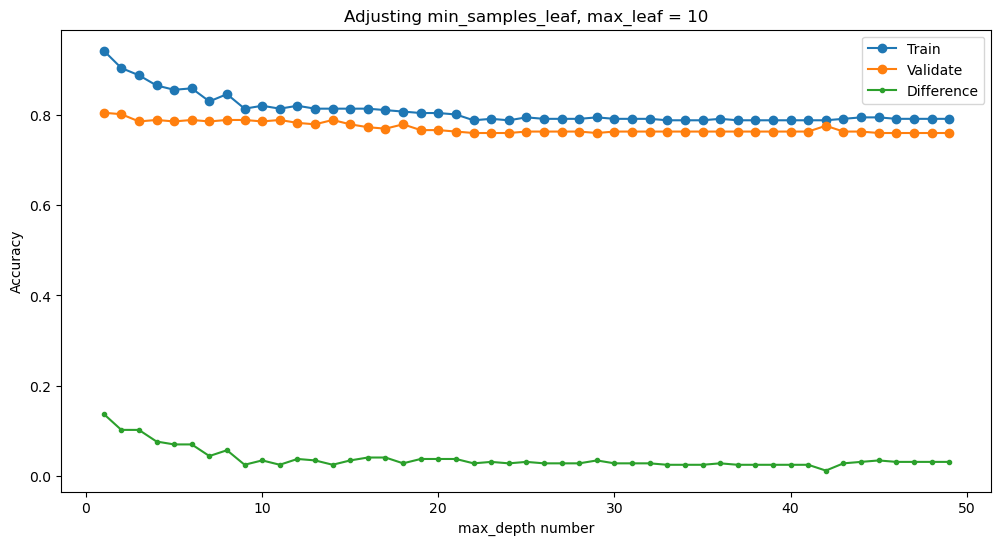

In [33]:

plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label= 'Validate')
plt.plot(df.max_depth, df.difference, marker = '.', label = 'Difference')
plt.legend()
plt.title("Adjusting min_samples_leaf, max_leaf = 10")
plt.xlabel("max_depth number")
plt.ylabel("Accuracy")
plt.show()


### Adjusting min_samples_leaf, max_leaf = 25:

In [34]:
metrics = []

for i in range(1, 50):
    rf_5 = RandomForestClassifier(max_depth=25, min_samples_leaf = i, random_state= 42)
    rf_5 = rf_5.fit(X_train, y_train)
    in_sample_accuracy = rf_5.score(X_train, y_train)
    out_of_sample_accuracy = rf_5.score(X_val, y_val)

    output = {"max_depth" : i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    metrics.append(output)

df = pd.DataFrame(metrics)              
df['difference'] = df.train_accuracy - df.validate_accuracy              
#df              


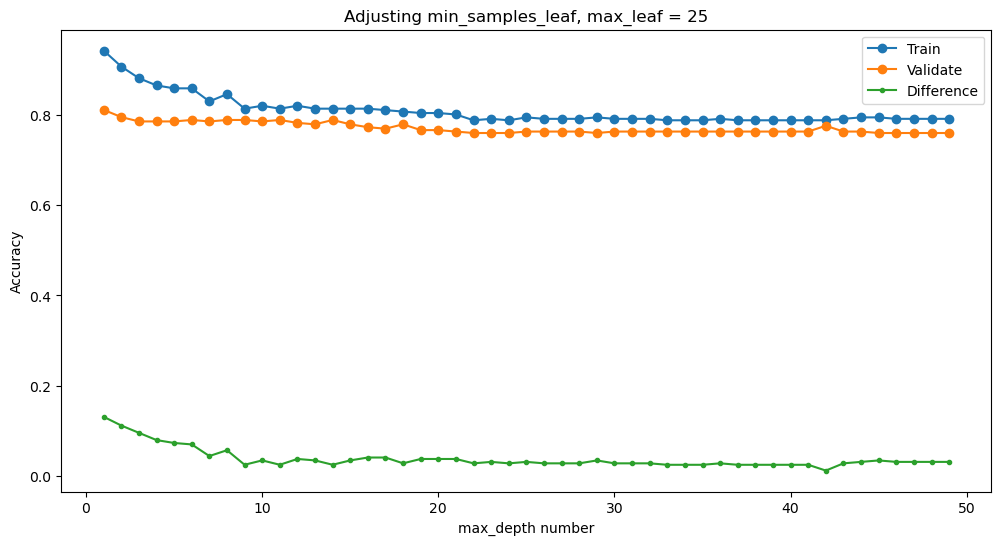

In [35]:

plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label= 'Validate')
plt.plot(df.max_depth, df.difference, marker = '.', label = 'Difference')
plt.legend()
plt.title("Adjusting min_samples_leaf, max_leaf = 25")
plt.xlabel("max_depth number")
plt.ylabel("Accuracy")
plt.show()


### Adjusting min_samples_leaf, max_leaf = 50:

In [36]:
metrics = []

for i in range(1, 50):
    rf_5 = RandomForestClassifier(max_depth=50, min_samples_leaf = i, random_state= 42)
    rf_5 = rf_5.fit(X_train, y_train)
    in_sample_accuracy = rf_5.score(X_train, y_train)
    out_of_sample_accuracy = rf_5.score(X_val, y_val)

    output = {"max_depth" : i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    metrics.append(output)

df = pd.DataFrame(metrics)              
df['difference'] = df.train_accuracy - df.validate_accuracy              
#df              


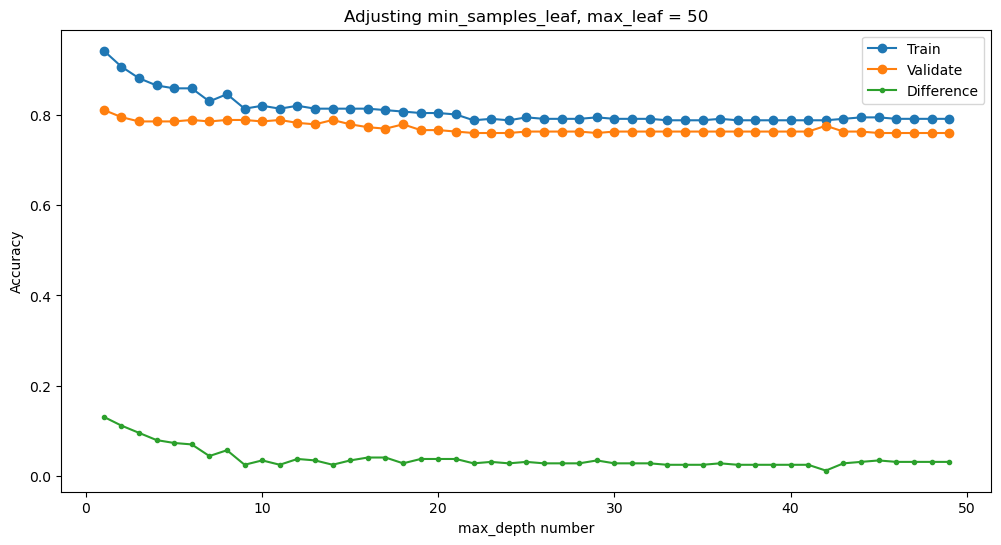

In [37]:

plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label= 'Validate')
plt.plot(df.max_depth, df.difference, marker = '.', label = 'Difference')
plt.legend()
plt.title("Adjusting min_samples_leaf, max_leaf = 50")
plt.xlabel("max_depth number")
plt.ylabel("Accuracy")
plt.show()


### Adjusting max_depth and min_sample_leaf upwards in parallel:

In [38]:
metrics = []

for i in range(1, 50):
    rf_5 = RandomForestClassifier(max_depth=i, min_samples_leaf = i, random_state= 42)
    rf_5 = rf_5.fit(X_train, y_train)
    in_sample_accuracy = rf_5.score(X_train, y_train)
    out_of_sample_accuracy = rf_5.score(X_val, y_val)

    output = {"max_depth" : i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    metrics.append(output)

df = pd.DataFrame(metrics)              
df['difference'] = df.train_accuracy - df.validate_accuracy              
#df              


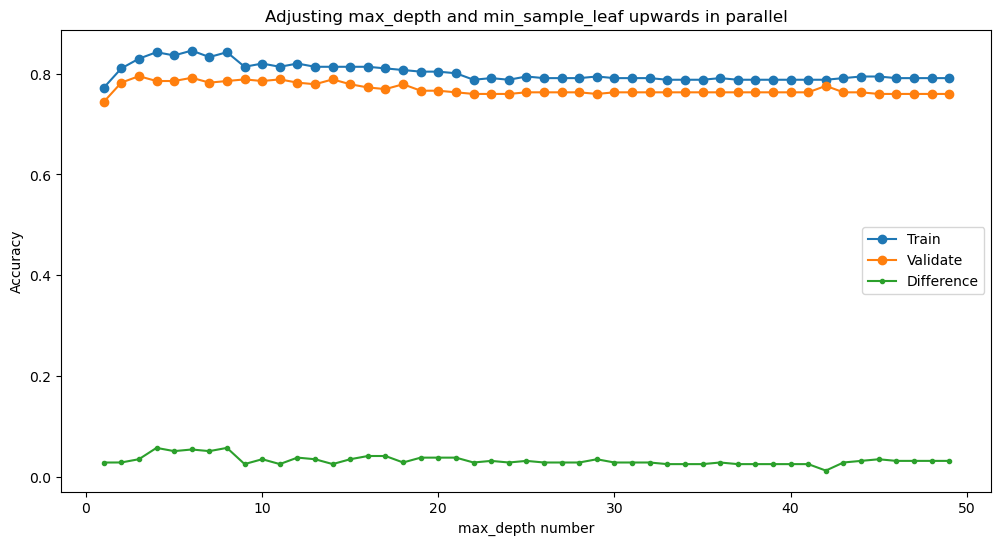

In [39]:

plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label= 'Validate')
plt.plot(df.max_depth, df.difference, marker = '.', label = 'Difference')
plt.legend()
plt.title("Adjusting max_depth and min_sample_leaf upwards in parallel")
plt.xlabel("max_depth number")
plt.ylabel("Accuracy")
plt.show()


### Adjusting max_depth (ascending) and min_samples_leaf (decending):

In [40]:
metrics = []

for i in range(1, 50):
    rf_5 = RandomForestClassifier(max_depth=i, min_samples_leaf = (51-i), random_state= 42)
    rf_5 = rf_5.fit(X_train, y_train)
    in_sample_accuracy = rf_5.score(X_train, y_train)
    out_of_sample_accuracy = rf_5.score(X_val, y_val)

    output = {"max_depth" : i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    metrics.append(output)

df = pd.DataFrame(metrics)              
df['difference'] = df.train_accuracy - df.validate_accuracy              
#df              


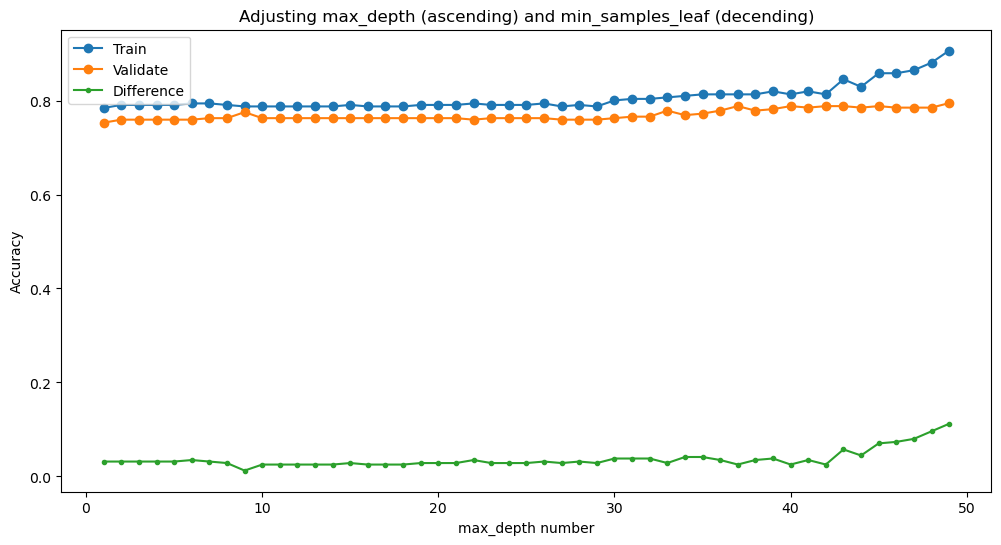

In [41]:

plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label= 'Validate')
plt.plot(df.max_depth, df.difference, marker = '.', label = 'Difference')
plt.legend()
plt.title("Adjusting max_depth (ascending) and min_samples_leaf (decending)")
plt.xlabel("max_depth number")
plt.ylabel("Accuracy")
plt.show()


### Adjusting max_depth (decending) and min_samples_leaf (ascending):

In [42]:
metrics = []

for i in range(1, 50):
    rf_5 = RandomForestClassifier(max_depth= (51-i), min_samples_leaf = (i), random_state= 42)
    rf_5 = rf_5.fit(X_train, y_train)
    in_sample_accuracy = rf_5.score(X_train, y_train)
    out_of_sample_accuracy = rf_5.score(X_val, y_val)

    output = {"max_depth" : i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    metrics.append(output)

df = pd.DataFrame(metrics)              
df['difference'] = df.train_accuracy - df.validate_accuracy              
#df              


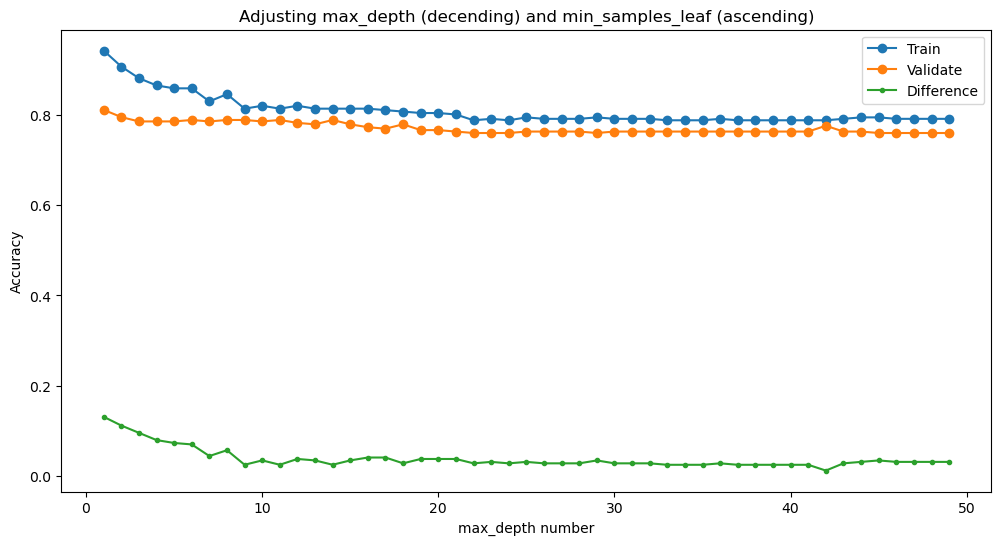

In [43]:

plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label= 'Validate')
plt.plot(df.max_depth, df.difference, marker = '.', label = 'Difference')
plt.legend()
plt.title("Adjusting max_depth (decending) and min_samples_leaf (ascending)")
plt.xlabel("max_depth number")
plt.ylabel("Accuracy")
plt.show()
